In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 1. Régression linéaire simple

### 1) Installez la bibliothèque sklearn

In [44]:
from sklearn.datasets import load_boston

### 2) Créez un notebook pour lire la base de données «Boston housing dataset » et générez un dataframe.

In [45]:
boston_dataset = load_boston()
boston_df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

boston_df['MEDV'] = boston_dataset.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### Description des champs
 - **CRIM**     : per capita crime rate by town
 - **ZN**       : proportion of residential land zoned for lots over 25,000 sq.ft.
 - **INDUS**    : proportion of non-retail business acres per town
 - **CHAS**     : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - **NOX**      : nitric oxides concentration (parts per 10 million)
 - **RM**       : average number of rooms per dwelling
 - **AGE**      : proportion of owner-occupied units built prior to 1940
 - **DIS**      : weighted distances to five Boston employment centres
 - **RAD**      : index of accessibility to radial highways
 - **TAX**      : full-value property-tax rate per $10,000
 - **PTRATIO**  : pupil-teacher ratio by town
 - **B**        : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - **LSTAT**    : % lower status of the population
 - **MEDV**     : Median value of owner-occupied homes in $1000's

### 3) Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes). Générez un histogramme de la distribution de la variable dépendante.

In [46]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [47]:
boston_df.isnull().sum()  # Check for missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

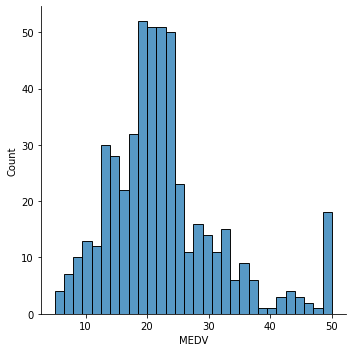

In [48]:
sns.displot(boston_df['MEDV'], bins=30)

### 4) Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE. Commentez vos observations.

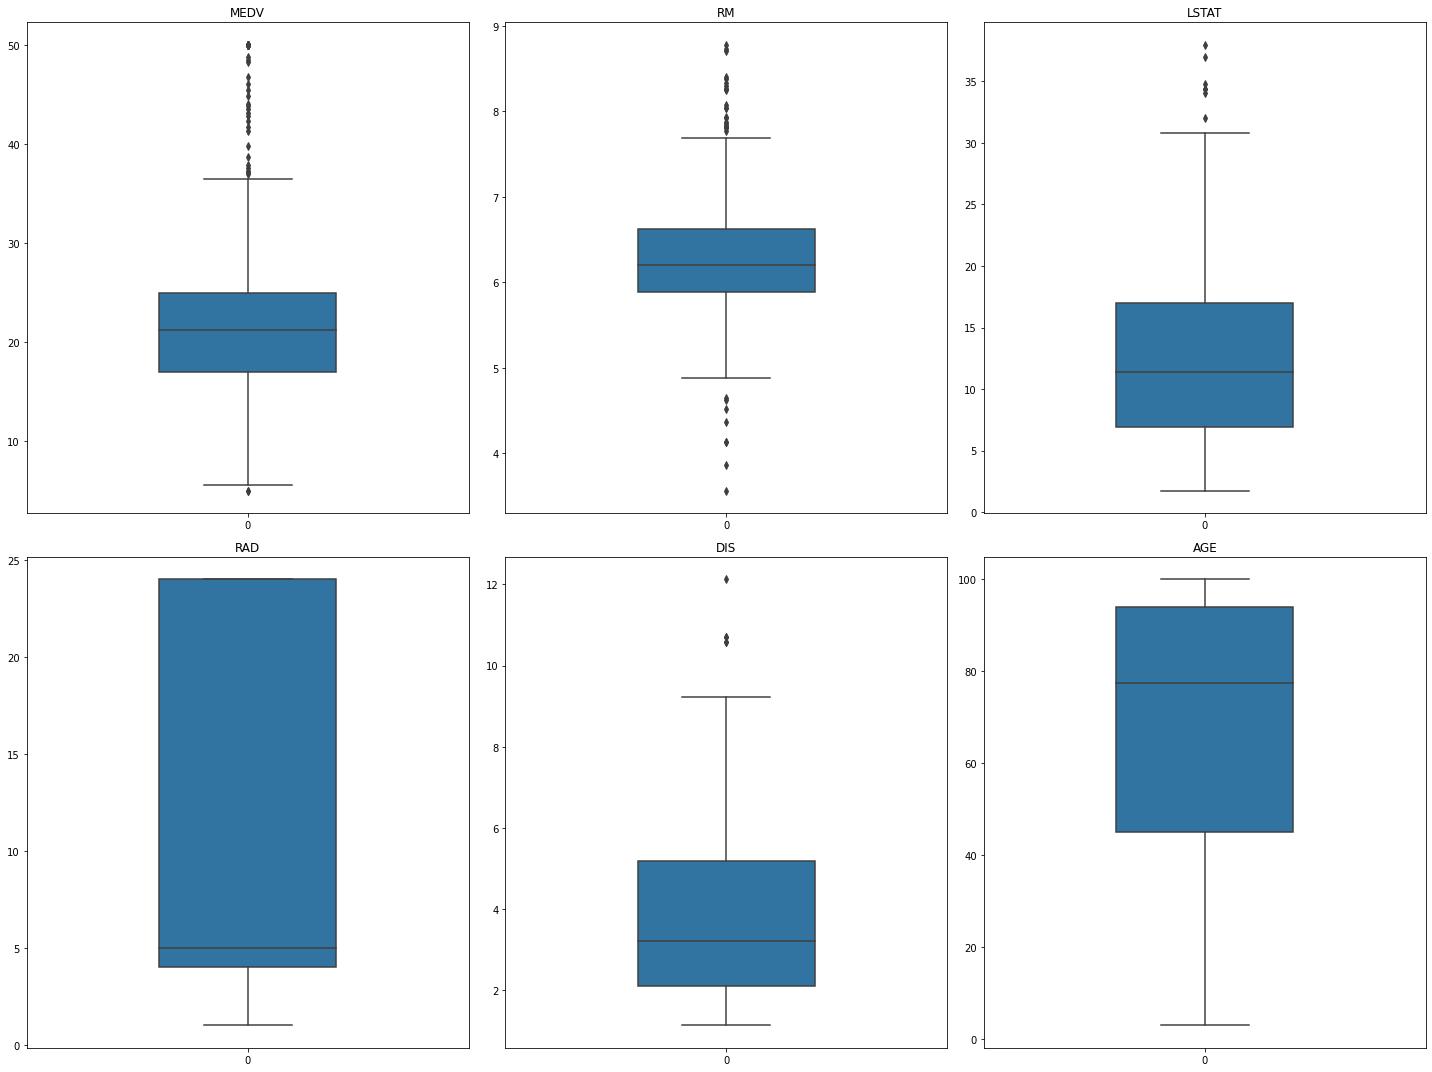

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
variables = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']
currentBox = 0

for i in range(2):
    for j in range(3):
        ax[i][j].set_title(variables[currentBox])
        sns.boxplot(data=boston_df[variables[currentBox]], ax=ax[i][j], width=0.4)
        currentBox += 1

plt.tight_layout()
plt.show()

- **MEDV** :
  Il y a beaucoup de valeurs aberrantes en dessus de 37, il s'agit probalbement des riches qui ont des maisons qui coûtent très chères mais qui sont peu nombreux.

- **RM**
  La majorité des logements ont un nombre de pièce autour de 6 car la majorité des gens ont des maisons "classiques" Les outliers vers le haut sont probablement les riches avec des manoirs et les outliers du bas sont probablement les très pauvres.

- **LSTAT** :
  Il y a environ 15% des gens qui sont pauvres. Les outliers du haut sont à nouveau les très riches

- **RAD** :
  La moitié des autoroutes on un indice d'accessibilité de 5 à 24. Ca nous fait une belle jambe

- **DIS** :

  
- **AGE** :


### 5) Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT, chaque fois utilisant seulement une des variables. Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer la performance moyenne du modèle. Commentez vos résultats.

### 6) Explorez les hyper-paramètres : learning_rate et nombre d’epochs d’entraînement. Calculez la performance moyenne (c.a.d., la moyenne de x100 fois le coefficient de détermination calculé sur le test set) du meilleur modèle trouvé par validation hold-out. Indiquez la valeur des hyper-paramètres qui donnent les meilleurs résultats et la meilleure performance trouvée. Générez un scatter-plot affichant les données (variable indépendante, variable dépendante) et la ligne droite trouvée par régression linéaire. (Note : la variable dépendante est MEDV).

# 2. Régression linéaire multiple

### 1) Utilisez la bibliothèque sklearn pour entraîner un modèle de régression linéaire multiple qui exploite plusieurs variables indépendantes (p.ex. RM et LSTAT) de la base de données « Boston Housing dataset ».

### 2) Utilisez la bibliothèque sklearn pour préparer les données pour faire une validation hold-out ainsi que pour le calcul du coefficient de détermination (r2_score) des modèles.

### 3) Présentez les résultats de vos expériences (points 1 et 2) avec la base de données proposée et commentez ceux-ci.

### 4) Générez un scatter-plot (valeur prédite, variable dépendante) et une ligne droite correspondant à l’équation valeur prédite = valeur dépendante (Note : la variable dépendante est MEDV).